# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

#### Importing the requied libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Read the dataset to the python environment.

In [47]:
data=pd.read_excel('iris.xls')

In [48]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
data.shape

(150, 5)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 2. Do necessary pre-processing steps.

In [51]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [52]:
data['SL'].fillna(data['SL'].median(),inplace = True) 

In [53]:
data['SW'].fillna(data['SW'].median(),inplace = True)

In [54]:
data['PL'].fillna(data['PL'].median(),inplace = True)

In [55]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Null values in the columns SL, SW and PL have been filled with the respective median.

#### Checking for outliers

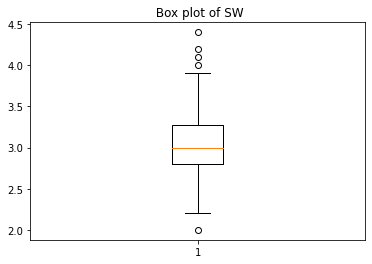

In [56]:
plt.boxplot(data['SW'])
plt.title(' Box plot of SW');

#### Detecting and removing outliers by IQR method

In [57]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [58]:
data['SW'].median()

3.0

In [59]:
IQR=Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

Lower limit is :  2.1249999999999996
Upper limit is :  3.9250000000000003


In [60]:
outlier=[]
for x in data['SW']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)

In [61]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [62]:
data=data[(data.SW<upper_limit)&(data.SW>low_limit)]
data.shape

(145, 5)

#### Outlier rows have been removed.

#### Find out which classification model gives the best result to predict iris species.

In [63]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [64]:
x=data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [95]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes',average='macro'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes',average='macro'))
print('f1 is:',f1_score(y_test,y_pred,pos_label='yes',average='macro'))

Accuracy is: 0.918918918918919
Precision is: 0.9076923076923077
recall is: 0.9153439153439153
f1 is: 0.9103313840155945


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [79]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

#### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [81]:
acc_values

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

Text(0, 0.5, 'accuracy')

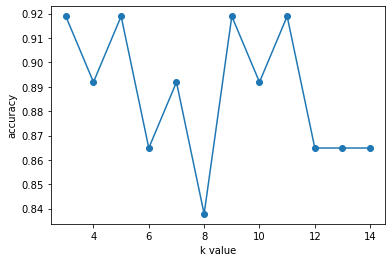

In [82]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [83]:
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [85]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes',average='micro'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes',average='micro'))
print('f1 is:',f1_score(y_test,y_pred,pos_label='yes',average='micro'))

Accuracy is: 0.918918918918919
Precision is: 0.918918918918919
recall is: 0.918918918918919
f1 is: 0.918918918918919


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [86]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

#### Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt_model = DecisionTreeClassifier()

In [89]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred = dt_model.predict(x_test)

In [93]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes',average='macro'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes',average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,pos_label='yes',average='macro'))

Accuracy is: 0.918918918918919
Precision is: 0.9076923076923077
recall is: 0.9153439153439153
f1 score is: 0.9103313840155945


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [96]:
y_test.value_counts()

Classification 
Iris-setosa        14
Iris-virginica     14
Iris-versicolor     9
dtype: int64

In [97]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

 #### Random forest classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

<ipython-input-98-277bc999996e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [99]:
from sklearn.metrics import f1_score,confusion_matrix

In [100]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,pos_label='yes',average='macro'))
print('recall is:',recall_score(y_test,y_pred,pos_label='yes',average='macro'))
print('f1 score is:',f1_score(y_test,y_pred,pos_label='yes',average='macro'))

Accuracy is: 0.9459459459459459
Precision is: 0.9391534391534391
recall is: 0.9391534391534391
f1 score is: 0.9391534391534391


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [101]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [102]:
data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


#### CONCLUSION 
The accuracy, precision and F1 score which we got from Random forest classifier shows that it is the better model compared to others.